In [1]:
import cv2 as cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

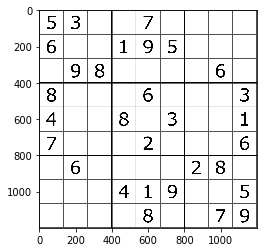

In [2]:
sudoku_img = cv.imread("sudoku1.png")
plt.imshow(sudoku_img)

109


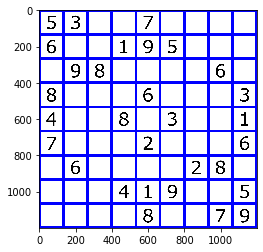

In [3]:
#run hough line transform over the image
gray = cv.cvtColor(sudoku_img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,240,255,cv.THRESH_BINARY)
thresh = cv.bitwise_not(thresh)

accumulator_threshold = 300
minLineLength = 800
maxLineGap = 20
lines = cv.HoughLinesP(thresh, rho = 1, theta = np.pi/180, threshold = accumulator_threshold, 
                            minLineLength = minLineLength, maxLineGap = maxLineGap)
np.seterr(divide='ignore', invalid='ignore')

color = [0,0,255]
new_img = sudoku_img.copy()
for ele in lines:
    new_img = cv.line(new_img,(ele[0][0],ele[0][1]),(ele[0][2],ele[0][3]),color,9)

print(len(lines))
plt.imshow(new_img)

In [12]:
# #if there are lines at a gap of 30 pixels, merge them  ----- why though?

# line_df = []
# for ele in lines:
#     line_df.append(ele[0])
    
# line_df = pd.DataFrame(line_df, columns = ['xmin','ymin','xmax','ymax'])
# line_df = line_df.sort_values(by=['xmin','ymin','xmax','ymax'])

# def get_orientation(index, line_df):
#     if abs(line_df.iloc[index][0] - line_df.iloc[index][2]) < 5:
#         return 90
#     elif abs(line_df.iloc[index][1] - line_df.iloc[index][3]) < 5:
#         return 0

# def remove_repetitive_lines(ls_df):
#     for index, row in ls_df.iterrows():
#         for index1, row1 in ls_df.iterrows():
#             if row.equals(row1)==False:
#                 if abs(int(row['xmin'])-int(row1['xmin']))<=10 and abs(int(row['xmax'])-int(row1['xmax']))<=10: #if both lines are in same plane
#                     if int(row1['ymin'])>(int(row['ymin'])) and int(row1['ymax'])<(int(row['ymax'])):
#                         if index1 in ls_df.index.values:
#                             ls_df = ls_df.drop(index1, axis=0)
            
#                 if abs(int(row['ymin'])-int(row1['ymin']))<=10 and abs(int(row['ymax'])-int(row1['ymax']))<=10: #if both lines are in same plane
#                     if int(row1['xmin'])>(int(row['xmin'])) and int(row1['xmax'])<(int(row['xmax'])):
#                         if index1 in ls_df.index.values:
#                             ls_df = ls_df.drop(index1, axis=0)
                        
#     return ls_df

# def merge_lines(line_df):
#     last_index = len(line_df)
#     for index, row in line_df.iterrows():
#         for index1, row1 in line_df.iterrows():
#             if get_orientation(index,line_df)==get_orientation(index1,line_df)==0:
#                 if abs(line_df.iloc[index][2] - line_df.iloc[index1][0]) <=30 :
#                     line_df.at[last_index] = [line_df.iloc[index][0],line_df.iloc[index][1],line_df.iloc[index1][2],line_df.iloc[index][3]]
#                     last_index+=1
#                     line_df = line_df.drop([index,index1],axis=0)
#             elif get_orientation(index,line_df)==get_orientation(index1,line_df)==90:
#                 if abs(line_df.iloc[index][3] - line_df.iloc[index1][1]) <=30 :
#                     line_df.at[last_index] = [line_df.iloc[index][0],line_df.iloc[index][1],line_df.iloc[index][2],line_df.iloc[index1][3]]
#                     last_index+=1
#                     line_df = line_df.drop([index,index1],axis=0)
#     return line_df

# # line_df_mod = merge_lines(line_df)
# line_df_mod = remove_repetitive_lines(line_df)

In [13]:
# line_df_mod

,xmin,ymin,xmax,ymax
1,0,2,1199,2
26,0,133,1199,133
7,0,267,1199,267
2,0,797,1199,797
51,0,1199,0,0
...,...,...,...,...
45,1067,1199,1067,0
24,1196,1199,1196,0
42,1197,1199,1197,0
12,1198,1199,1198,0


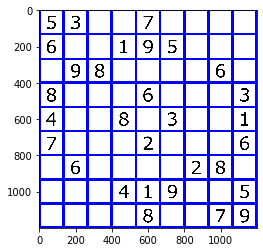

In [14]:
# color = [0,0,255]
# new_img = sudoku_img.copy()
# for index, row in line_df_mod.iterrows():
#     new_img = cv.line(new_img,(row['xmin'],row['ymin']),(row['xmax'],row['ymax']),color,9)

# # print(len(lines))
# plt.imshow(new_img)

In [57]:
#crop 81 images for each box and save the image
gray = cv.cvtColor(sudoku_img,cv.COLOR_BGR2GRAY)
w,h = gray.shape
width = math.floor(w/9)
height = math.floor(h/9)
gray = gray[0:width*9,0:height*9]
counter = 1
for i in range(0,w-width,width):
    for j in range(0,h-height,height):
        crop = gray[i:i+width,j:j+height]
        cv.imwrite("crop_img/crop_"+str(counter)+".png",crop)
        counter+=1
        

In [58]:
#run digit recognition model for each of the image

In [59]:
#create an array for each image

In [ ]:
#solve the sudoku array